In [1]:
from learningAgents import ReinforceAlgorithm
from environmentModel import Model, AdversaryModes
from NeuralNetwork import NeuralNetwork
import torch
import torch.nn as nn
from torch.distributions import Categorical

In [2]:
adversaryProbs=torch.zeros(len(AdversaryModes))
adversaryProbs[0]=1
game = Model(totalDemand = 400, 
               tupleCosts = (57, 71),
              totalStages = 5, adversaryProbs=adversaryProbs)

In [3]:
neuralNet=NeuralNetwork(lr = 0.001, num_input= 2, num_actions=20, nn_dim = 150)
algorithm = ReinforceAlgorithm(game, neuralNet, numberBatches=50, numberEpiPerBatch=1000, discountFactor =1, creditFactor = 1, numberIterations = 1)

In [4]:
algorithm.solver()

0
tensor([0.0447, 0.0522, 0.0505, 0.0466, 0.0532, 0.0479, 0.0460, 0.0588, 0.0498,
        0.0446, 0.0429, 0.0588, 0.0562, 0.0549, 0.0552, 0.0432, 0.0471, 0.0456,
        0.0539, 0.0478], grad_fn=<SoftmaxBackward0>)
tensor([0.0374, 0.0517, 0.0558, 0.0467, 0.0529, 0.0554, 0.0456, 0.0638, 0.0477,
        0.0488, 0.0423, 0.0600, 0.0498, 0.0542, 0.0571, 0.0406, 0.0495, 0.0426,
        0.0522, 0.0459], grad_fn=<SoftmaxBackward0>)
25
tensor([0.0414, 0.0388, 0.0486, 0.0545, 0.0457, 0.0392, 0.0603, 0.0491, 0.0782,
        0.0408, 0.0341, 0.0742, 0.0393, 0.0393, 0.0610, 0.0413, 0.0522, 0.0386,
        0.0660, 0.0574], grad_fn=<SoftmaxBackward0>)
tensor([0.0363, 0.0390, 0.0504, 0.0511, 0.0382, 0.0413, 0.0605, 0.0469, 0.0974,
        0.0381, 0.0315, 0.0731, 0.0399, 0.0343, 0.0606, 0.0412, 0.0527, 0.0405,
        0.0626, 0.0643], grad_fn=<SoftmaxBackward0>)


In [5]:
import pandas as pd
profits = pd.DataFrame(game.profit).T
prices = pd.DataFrame(game.prices).T
demandPotential = pd.DataFrame(game.demandPotential).T
learning = pd.DataFrame(algorithm.returns.mean(axis = 0),columns=['entry'])

<AxesSubplot:>

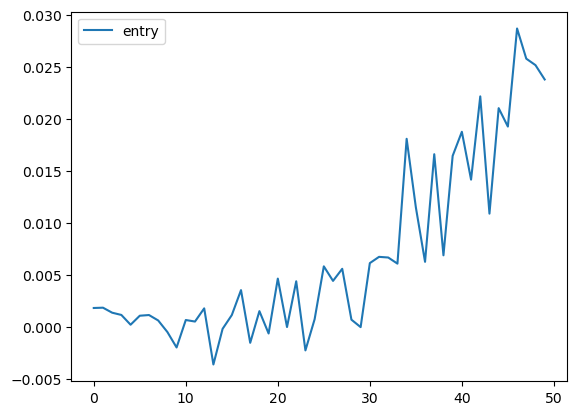

In [6]:
learning.plot()

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
learning = learning.to_numpy()

In [9]:
learning_2 = [0]*len(learning)
for i in range(len(learning_2)):
    learning_2[i] = learning[i][0]

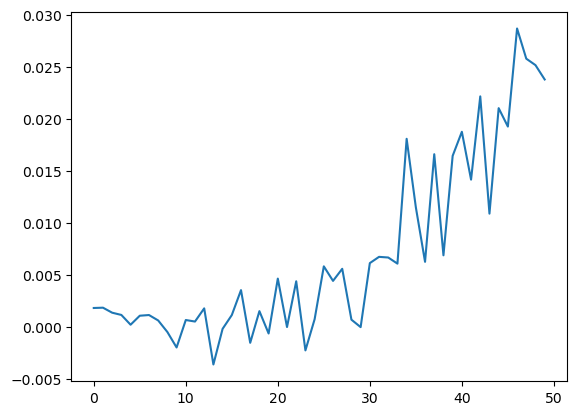

In [10]:
plt.plot(learning_2)
plt.show()

In [11]:
avg_learning = np.convolve(learning_2, np.ones(1000)/1000, mode = 'valid')

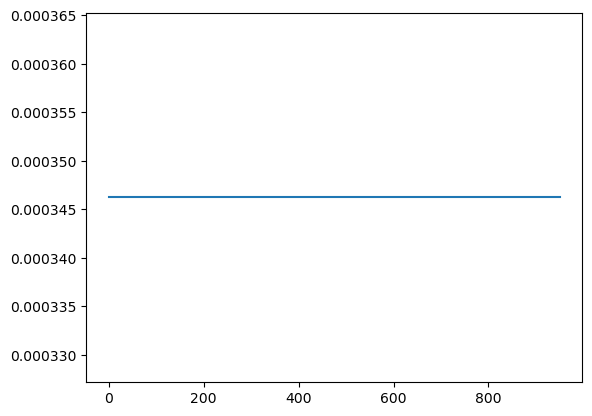

In [12]:
plt.plot(avg_learning)
plt.show()